# Data analysis : Theme

Données des entités juridiques de santé et sociale du département des landes

## Step 0 : Preparations

### Step 0.1 : Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
import seaborn as sns

### Step 0.2 : Load files, or call API

In [3]:
# 197 mo file
# link to download : https://public.opendatasoft.com/explore/dataset/sirene_v3/download/?format=csv&disjunctive.libellecommuneetablissement=true&disjunctive.etatadministratifetablissement=true&disjunctive.sectionetablissement=true&disjunctive.naturejuridiqueunitelegale=true&refine.departementetablissement=LANDES&timezone=Europe/Paris&lang=fr&use_labels_for_header=true&csv_separator=%3B

df=pd.read_csv("finess-entite-juridique-1.csv", error_bad_lines=False, sep=";")

## Step 1 : Exploratory Data Analysis

### Step 1.1 : Check data shape

In [4]:
df.shape

(608, 30)

In [5]:
df

Donnée  Numéro FINESS                Raison sociale  \
0    structureej      400000204           CLINIQUE DES LANDES   
1    structureej      400000253          CHATEAU DE CAUNEILLE   
2    structureej      400000618  FONDATION ST VINCENT DE PAUL   
3    structureej      400001079           CCAS  CARCEN PONSON   
4    structureej      400001145        ASSOCIATION D'HAGETMAU   
..           ...            ...                           ...   
603  structureej      400012373         ASS LOC ADMR SOUSTONS   
604  structureej      400013249                SAS SENSICORPS   
605  structureej      400786349      C.C.A.S. RION-DES-LANDES   
606  structureej      400787164             C.C.A.S. SEYRESSE   
607  structureej      400789988              C.C.A.S. BOSTENS   

                Raison sociale longue Complément de raison sociale  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2     FONDATION SAINT VINCENT DE PAUL                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   
..                                ...                          ...   
603                               NaN                          NaN   
604                    SAS SENSICORPS                          NaN   
605  CENTRE COMMUNAL D'ACTION SOCIALE                          NaN   
606  CENTRE COMMUNAL D'ACTION SOCIALE                          NaN   
607  CENTRE COMMUNAL D'ACTION SOCIALE                          NaN   

     Numéro de voie Type de voie         Libellé de voie Complément de voie  \
0             250.0            R  FREDERIC JOLIOT-CURRIE                NaN   
1             400.0          RTE          DE PEYREHORADE                NaN   
2               NaN          NaN                     NaN                NaN   
3               NaN          NaN                     NaN                NaN   
4               NaN          NaN                     NaN                NaN   
..              ...          ...                     ...                ...   
603             NaN           PL              DU 1ER MAI                NaN   
604             1.0           BD                  CARNOT                NaN   
605           148.0           AV          ALBERT POISSON                NaN   
606             NaN          RTE             DE L'EGLISE                NaN   
607             NaN          NaN                     NaN                NaN   

    Complément de distribution  ... Numéro de SIREN  Code APE  \
0                          NaN  ...     782097745.0     8610Z   
1                          NaN  ...     321289985.0     8720A   
2                          NaN  ...     782123848.0       NaN   
3                          NaN  ...     264000654.0     8899B   
4                          NaN  ...             NaN       NaN   
..                         ...  ...             ...       ...   
603                        NaN  ...             NaN       NaN   
604                        NaN  ...     789335494.0     9604Z   
605                     MAIRIE  ...     264002403.0     8899B   
606                        NaN  ...     264002957.0     8899B   
607                     MAIRIE  ...             NaN       NaN   

    Date de création  Code Postal                    Coordonnees  nt_voie  \
0         2001-01-01        40280  43.8401834528,-0.518454816406    250 R   
1         2001-01-01        40300   43.5733522216,-1.11025729076  400 RTE   
2         2001-01-01        40990   43.7691479541,-1.07410585262      NaN   
3         2001-01-01        40400  43.8530294312,-0.790542809591      NaN   
4         2001-01-01        40700  43.6284704452,-0.593663357831      NaN   
..               ...          ...                            ...      ...   
603       2011-01-01        40140   43.7629098488,-1.27641282315       PL   
604       2012-01-11        40100   43.700

### Step 1.2 : Check each data type of columns and missing values

In [6]:
df.columns

Index(['Donnée', 'Numéro FINESS', 'Raison sociale', 'Raison sociale longue',
       'Complément de raison sociale', 'Numéro de voie', 'Type de voie',
       'Libellé de voie', 'Complément de voie', 'Complément de distribution',
       'Lieu-dit BP', 'Commune', 'Code Postal - Commune', 'Numéro Département',
       'Département', 'Téléphone', 'Code Statut juridique', 'Statut juridique',
       'Catégorie d'établissement', 'Libellé catégorie d'établissement',
       'Numéro de SIREN', 'Code APE', 'Date de création', 'Code Postal',
       'Coordonnees', 'nt_voie', 'ntl_voie', 'Addresse',
       'Activité Principale Exercée', 'Catégorie juridique'],
      dtype='object')

In [7]:
df = df[df["Département"]=="LANDES"] # On garde que les données du département des landes
df

Donnée  Numéro FINESS                Raison sociale  \
0    structureej      400000204           CLINIQUE DES LANDES   
1    structureej      400000253          CHATEAU DE CAUNEILLE   
2    structureej      400000618  FONDATION ST VINCENT DE PAUL   
3    structureej      400001079           CCAS  CARCEN PONSON   
4    structureej      400001145        ASSOCIATION D'HAGETMAU   
..           ...            ...                           ...   
603  structureej      400012373         ASS LOC ADMR SOUSTONS   
604  structureej      400013249                SAS SENSICORPS   
605  structureej      400786349      C.C.A.S. RION-DES-LANDES   
606  structureej      400787164             C.C.A.S. SEYRESSE   
607  structureej      400789988              C.C.A.S. BOSTENS   

                Raison sociale longue Complément de raison sociale  \
0                                 NaN                          NaN   
1                                 NaN                          NaN   
2     FONDATION SAINT VINCENT DE PAUL                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   
..                                ...                          ...   
603                               NaN                          NaN   
604                    SAS SENSICORPS                          NaN   
605  CENTRE COMMUNAL D'ACTION SOCIALE                          NaN   
606  CENTRE COMMUNAL D'ACTION SOCIALE                          NaN   
607  CENTRE COMMUNAL D'ACTION SOCIALE                          NaN   

     Numéro de voie Type de voie         Libellé de voie Complément de voie  \
0             250.0            R  FREDERIC JOLIOT-CURRIE                NaN   
1             400.0          RTE          DE PEYREHORADE                NaN   
2               NaN          NaN                     NaN                NaN   
3               NaN          NaN                     NaN                NaN   
4               NaN          NaN                     NaN                NaN   
..              ...          ...                     ...                ...   
603             NaN           PL              DU 1ER MAI                NaN   
604             1.0           BD                  CARNOT                NaN   
605           148.0           AV          ALBERT POISSON                NaN   
606             NaN          RTE             DE L'EGLISE                NaN   
607             NaN          NaN                     NaN                NaN   

    Complément de distribution  ... Numéro de SIREN  Code APE  \
0                          NaN  ...     782097745.0     8610Z   
1                          NaN  ...     321289985.0     8720A   
2                          NaN  ...     782123848.0       NaN   
3                          NaN  ...     264000654.0     8899B   
4                          NaN  ...             NaN       NaN   
..                         ...  ...             ...       ...   
603                        NaN  ...             NaN       NaN   
604                        NaN  ...     789335494.0     9604Z   
605                     MAIRIE  ...     264002403.0     8899B   
606                        NaN  ...     264002957.0     8899B   
607                     MAIRIE  ...             NaN       NaN   

    Date de création  Code Postal                    Coordonnees  nt_voie  \
0         2001-01-01        40280  43.8401834528,-0.518454816406    250 R   
1         2001-01-01        40300   43.5733522216,-1.11025729076  400 RTE   
2         2001-01-01        40990   43.7691479541,-1.07410585262      NaN   
3         2001-01-01        40400  43.8530294312,-0.790542809591      NaN   
4         2001-01-01        40700  43.6284704452,-0.593663357831      NaN   
..               ...          ...                            ...      ...   
603       2011-01-01        40140   43.7629098488,-1.27641282315       PL   
604       2012-01-11        40100   43.700

In [8]:
df = df.drop(['Numéro Département', 'Département'], axis=1)

In [9]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 607
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Donnée                             608 non-null    object 
 1   Numéro FINESS                      608 non-null    int64  
 2   Raison sociale                     608 non-null    object 
 3   Raison sociale longue              345 non-null    object 
 4   Complément de raison sociale       16 non-null     object 
 5   Numéro de voie                     320 non-null    float64
 6   Type de voie                       404 non-null    object 
 7   Libellé de voie                    414 non-null    object 
 8   Complément de voie                 5 non-null      object 
 9   Complément de distribution         35 non-null     object 
 10  Lieu-dit BP                        117 non-null    object 
 11  Commune                            608 non-null    int64  

<ipython-input-9-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


### Step 1.3 : Check the percentages of missing value and remove columns with only null values

In [10]:
print(df.isnull().sum() / df.shape[0])
print(df.shape)

# Drop columns with only null
df.dropna(axis=1, how='all', inplace=True)

print(df.isnull().sum() / df.shape[0])
print(df.shape)

Donnée                               0.000000
Numéro FINESS                        0.000000
Raison sociale                       0.000000
Raison sociale longue                0.432566
Complément de raison sociale         0.973684
Numéro de voie                       0.473684
Type de voie                         0.335526
Libellé de voie                      0.319079
Complément de voie                   0.991776
Complément de distribution           0.942434
Lieu-dit BP                          0.807566
Commune                              0.000000
Code Postal - Commune                0.000000
Téléphone                            0.215461
Code Statut juridique                0.000000
Statut juridique                     0.000000
Catégorie d'établissement            0.988487
Libellé catégorie d'établissement    0.988487
Numéro de SIREN                      0.259868
Code APE                             0.634868
Date de création                     0.000000
Code Postal                       

In [11]:
import operator

cols = {} #Dictionnaire qui contiendra pour chaque colonne le pourcentage des valeurs manquantes

for i in df.columns: #Remplir le dictionnaire d'abord
    cols[i] = df[i].isna().sum()/df.shape[0]

cols = sorted(cols.items(), key=operator.itemgetter(1)) #Puis le trier suivant le pourcentage de valeurs manquantes

for i in cols : #Et enfin afficher les colonnes, leurs types et le pourcentage de valeurs manquantes
    print('La colonne : ' + str(i[0]) + ', Le type : ' + str(df[i[0]].dtype) + 
          ', Le pourcentage des valeurs manquantes : '+ str(i[1]))

La colonne : Donnée, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Numéro FINESS, Le type : int64, Le pourcentage des valeurs manquantes : 0.0
La colonne : Raison sociale, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Commune, Le type : int64, Le pourcentage des valeurs manquantes : 0.0
La colonne : Code Postal - Commune, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Code Statut juridique, Le type : int64, Le pourcentage des valeurs manquantes : 0.0
La colonne : Statut juridique, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Date de création, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Code Postal, Le type : int64, Le pourcentage des valeurs manquantes : 0.0
La colonne : Addresse, Le type : object, Le pourcentage des valeurs manquantes : 0.0
La colonne : Coordonnees, Le type : object, Le pourcentage des valeurs manquantes : 0.041118421052631

### Step 1.4 : Summary Statistics

In [12]:
df.describe()

Numéro FINESS  Numéro de voie     Commune     Téléphone  \
count   6.080000e+02      320.000000  608.000000  4.770000e+02   
mean    4.000705e+08      152.737500  184.753289  5.615299e+08   
std     2.148097e+05      378.492712   93.542800  3.379738e+07   
min     4.000000e+08        1.000000    1.000000  4.784368e+08   
25%     4.000021e+08       11.000000  102.000000  5.584539e+08   
50%     4.000072e+08       35.000000  192.000000  5.587271e+08   
75%     4.000107e+08      107.750000  273.250000  5.587933e+08   
max     4.007915e+08     3134.000000  333.000000  9.838044e+08   

       Code Statut juridique  Catégorie d'établissement  Numéro de SIREN  \
count             608.000000                   7.000000     4.500000e+02   
mean               49.641447                 502.428571     3.735634e+08   
std                26.889298                 183.875734     1.743115e+08   
min                 1.000000                 355.000000     1.300178e+08   
25%                17.000000                 355.000000     2.640022e+08   
50%                60.000000                 355.000000     3.111578e+08   
75%                72.000000                 699.000000     4.175612e+08   
max                95.000000                 699.000000     9.872203e+08   

        Code Postal  
count    608.000000  
mean   40299.486842  
std      223.258016  
min    40000.000000  
25%    40130.000000  
50%    40255.000000  
75%    40392.500000  
max    40990.000000

### Step 1.5 : Check value counts for a specific column

In [13]:
# In this exemple, we notice in the next step that a SIREN can be used for multiple structure, but the siret seems to change, so we can test that theory
df["Numéro de SIREN"].value_counts()

775676398.0    2
264000639.0    2
264003757.0    2
264002999.0    2
264004375.0    2
              ..
441986684.0    1
491259594.0    1
453489866.0    1
264004383.0    1
264001058.0    1
Name: Numéro de SIREN, Length: 442, dtype: int64

### Step 1.6 : Check duplicate values

In [14]:
# Example of the data that have multiple values, for text you can use a graph to see count by word and see if some values correspond to the same thing
df[df["Numéro de SIREN"]== 264004375.0]

Donnée  Numéro FINESS               Raison sociale  \
267  structureej      400786372  C.I.A.S. DU CAP DE GASCOGNE   
350  structureej      400007118         CIAS CAP DE GASCOGNE   

                     Raison sociale longue Complément de raison sociale  \
267  CENTRE INTERCOMMUNAL D'ACTION SOCIALE                          NaN   
350                                    NaN                          NaN   

     Numéro de voie Type de voie Libellé de voie Complément de voie  \
267             1.0            R         BELLOCQ                NaN   
350             1.0            R         BELLOCQ                NaN   

    Complément de distribution  ... Numéro de SIREN  Code APE  \
267                        NaN  ...     264004375.0       NaN   
350                        NaN  ...     264004375.0     8899B   

    Date de création  Code Postal                   Coordonnees nt_voie  \
267       2001-01-01        40500  43.7482690127,-0.55557337698     1 R   
350       2004-01-01        40500  43.7482690127,-0.55557337698     1 R   

        ntl_voie                    Addresse  \
267  1 R BELLOCQ  1 R BELLOCQ 40500 ST SEVER   
350  1 R BELLOCQ  1 R BELLOCQ 40500 ST SEVER   

                Activité Principale Exercée Catégorie juridique  
267                                     NaN                 NaN  
350  Action sociale sans hébergement n.c.a.                 NaN  

[2 rows x 28 columns]

### Step 1.7 : See the data distribution and data anomaly

In [15]:
# Look at numerical columns to choose which column to look at more closely
numerical_columns = list(df.select_dtypes('number'))

print(numerical_columns)

['Numéro FINESS', 'Numéro de voie', 'Commune', 'Téléphone', 'Code Statut juridique', "Catégorie d'établissement", 'Numéro de SIREN', 'Code Postal']


Commune


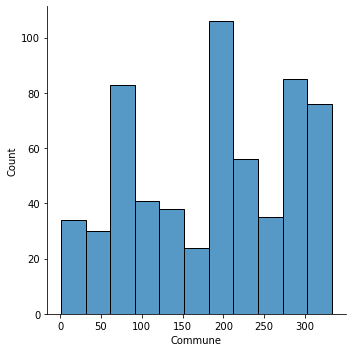

Téléphone


Code Statut juridique


Catégorie d'établissement


Numéro de SIREN


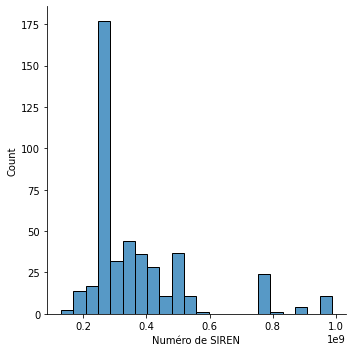

Code Postal


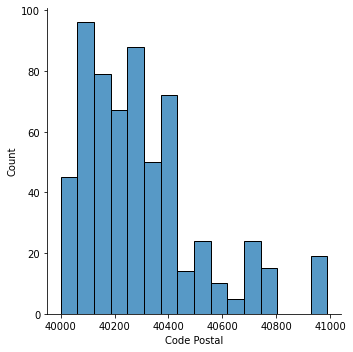

In [16]:
import matplotlib.pyplot as plt

for column in ['Commune', 'Téléphone', 'Code Statut juridique', "Catégorie d'établissement", 'Numéro de SIREN', 'Code Postal']:
    sns.displot(df, x=column)
    print(column)
    plt.show()

### Step 1.8 : Check the correlation between variables in the data

<AxesSubplot:>

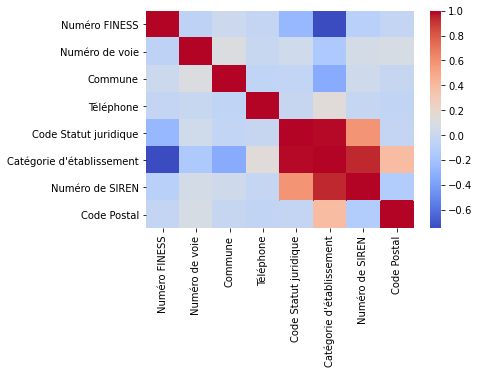

In [17]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, cmap= 'coolwarm')

In [18]:
# If there are too many columns, you can try the methods below
correlation_mat = df.corr()

corr_pairs = correlation_mat.unstack()
print(corr_pairs)

sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

Numéro FINESS  Numéro FINESS                1.000000
               Numéro de voie              -0.059172
               Commune                      0.011672
               Téléphone                   -0.028871
               Code Statut juridique       -0.263273
                                              ...   
Code Postal    Téléphone                   -0.043888
               Code Statut juridique       -0.029860
               Catégorie d'établissement    0.397680
               Numéro de SIREN             -0.126580
               Code Postal                  1.000000
Length: 64, dtype: float64
Numéro FINESS              Catégorie d'établissement   -0.749161
Catégorie d'établissement  Numéro FINESS               -0.749161
                           Commune                     -0.334571
Commune                    Catégorie d'établissement   -0.334571
Numéro FINESS              Code Statut juridique       -0.263273
                                                          ...   


## Step 2 : Data cleaning

### Step 2.1 : Remove irrelevant observations

### Step 2.2 : Remove unwanted outliers

In [19]:
df.columns

Index(['Donnée', 'Numéro FINESS', 'Raison sociale', 'Raison sociale longue',
       'Complément de raison sociale', 'Numéro de voie', 'Type de voie',
       'Libellé de voie', 'Complément de voie', 'Complément de distribution',
       'Lieu-dit BP', 'Commune', 'Code Postal - Commune', 'Téléphone',
       'Code Statut juridique', 'Statut juridique',
       'Catégorie d'établissement', 'Libellé catégorie d'établissement',
       'Numéro de SIREN', 'Code APE', 'Date de création', 'Code Postal',
       'Coordonnees', 'nt_voie', 'ntl_voie', 'Addresse',
       'Activité Principale Exercée', 'Catégorie juridique'],
      dtype='object')

<AxesSubplot:>

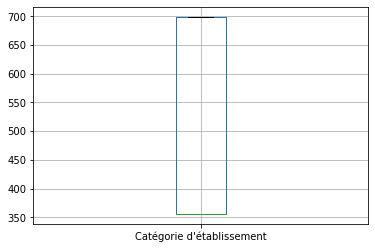

In [20]:
df.boxplot(column=["Catégorie d'établissement"])

In [21]:
df["Catégorie d'établissement"].describe()

count      7.000000
mean     502.428571
std      183.875734
min      355.000000
25%      355.000000
50%      355.000000
75%      699.000000
max      699.000000
Name: Catégorie d'établissement, dtype: float64

### Step 2.3 : Handle missing data (drop observations, input missing values based on other observations)

### Step 2.4 : Remove remaining columns with a high percentage of missing values

In [22]:
print(df.shape)
# To remove columns with more than 95% of null : thresh=int( df.shape[0] * 0.95)
# df.dropna(axis=1, thresh=int( df.shape[0] * 0.95) , inplace=True)

print(df.shape)

(608, 28)
(608, 28)


In [23]:
print(df.isnull().sum().sort_values() / df.shape[0] * 100)

Donnée                                0.000000
Numéro FINESS                         0.000000
Raison sociale                        0.000000
Addresse                              0.000000
Code Postal                           0.000000
Date de création                      0.000000
Statut juridique                      0.000000
Code Statut juridique                 0.000000
Code Postal - Commune                 0.000000
Commune                               0.000000
Coordonnees                           4.111842
Téléphone                            21.546053
Numéro de SIREN                      25.986842
ntl_voie                             31.250000
Libellé de voie                      31.907895
nt_voie                              32.894737
Type de voie                         33.552632
Raison sociale longue                43.256579
Numéro de voie                       47.368421
Activité Principale Exercée          63.486842
Code APE                             63.486842
Catégorie jur

### Step 2.5 : Fix structural errors *(strange naming conventions, typos, incorrect capitalization, mislabeled categories. Ex: “N/A” and “Not Applicable”  should be analyzed as the same category.)*

### Step 2.6 : Deal with duplicate values

In [24]:
df.columns

Index(['Donnée', 'Numéro FINESS', 'Raison sociale', 'Raison sociale longue',
       'Complément de raison sociale', 'Numéro de voie', 'Type de voie',
       'Libellé de voie', 'Complément de voie', 'Complément de distribution',
       'Lieu-dit BP', 'Commune', 'Code Postal - Commune', 'Téléphone',
       'Code Statut juridique', 'Statut juridique',
       'Catégorie d'établissement', 'Libellé catégorie d'établissement',
       'Numéro de SIREN', 'Code APE', 'Date de création', 'Code Postal',
       'Coordonnees', 'nt_voie', 'ntl_voie', 'Addresse',
       'Activité Principale Exercée', 'Catégorie juridique'],
      dtype='object')

In [25]:
key = ['Numéro de voie', 'Type de voie', 'Libellé de voie', 'Commune', 'Code Postal - Commune'] #Définition de la clé

In [26]:
df_duplicated = df[key].value_counts() # Enregistrer les occurences des tuples de la clé dans df_duplicated
print("Duplicate values :")
df_duplicated[df_duplicated>1] # Puis afficher les instances qui sont dupliquées

Duplicate values :


Numéro de voie  Type de voie  Libellé de voie    Commune  Code Postal - Commune     
11.0            R             CHARLES BARTHALOT  192      40000 MONT DE MARSAN          2
3.0             R             DE LA GUILLERIE    282      40500 ST SEVER                2
43.0            AV            MAURICE MARTIN     184      40200 MIMIZAN                 2
55.0            PL            FOCH               194      40380 MONTFORT EN CHALOSSE    2
11.0            R             ANATOLE FRANCE     197      40110 MORCENX                 2
169.0           R             GAMBETTA           224      40300 PEYREHORADE             2
3.0             R             DU DOCTEUR ROUX    197      40110 MORCENX                 2
36.0            R             DASTE              310      40141 SOUSTONS CEDEX          2
1.0             R             BELLOCQ            282      40500 ST SEVER                2
dtype: int64

In [27]:
df[df["Libellé de voie"]=="CHARLES BARTHALOT"]

Donnée  Numéro FINESS                Raison sociale  \
192  structureej      400008777  PHARMACIE CARRUETTE - BISTOS   
593  structureej      400005187           PHARMACIE CARRUETTE   

                  Raison sociale longue Complément de raison sociale  \
192        PHARMACIE CARRUETTE - BISTOS                          NaN   
593  PHARMACIE CARRUETTE MONT-DE-MARSAN                          NaN   

     Numéro de voie Type de voie    Libellé de voie Complément de voie  \
192            11.0            R  CHARLES BARTHALOT                NaN   
593            11.0            R  CHARLES BARTHALOT                NaN   

    Complément de distribution  ... Numéro de SIREN  Code APE  \
192                        NaN  ...     502127889.0       NaN   
593                        NaN  ...             NaN       NaN   

    Date de création  Code Postal                    Coordonnees nt_voie  \
192       1982-10-20        40000  43.8995565919,-0.490387056517    11 R   
593       2001-01-01        40000  43.8995565919,-0.490387056517    11 R   

                   ntl_voie                                     Addresse  \
192  11 R CHARLES BARTHALOT  11 R CHARLES BARTHALOT 40000 MONT DE MARSAN   
593  11 R CHARLES BARTHALOT  11 R CHARLES BARTHALOT 40000 MONT DE MARSAN   

     Activité Principale Exercée  \
192                          NaN   
593                          NaN   

                                  Catégorie juridique  
192  Organisme de retraite à adhésion non obligatoire  
593                          Administration de l'état  

[2 rows x 28 columns]

Là par exemple, on voit que meme si la clé est dupliquée, il s'agit pas du meme organisme.

### Step 2.7 : Split values into many columns

### Step 2.8 : Change the data type of columns 

- On change le type de la colonne "Numéro de voie" de Float64 à Int64

In [28]:
df['Numéro de voie'] = df['Numéro de voie'].astype("Int64")
df['Numéro de voie']

0       250
1       400
2      <NA>
3      <NA>
4      <NA>
       ... 
603    <NA>
604       1
605     148
606    <NA>
607    <NA>
Name: Numéro de voie, Length: 608, dtype: Int64

## Step 3 : Export dataframe to csv

In [29]:
from pathlib import Path

filepath = Path('finess-entite-juridique-1_clean.csv')
df.to_csv(filepath, index=False)